# Ford GoBike System Dataset Analysis
## by Reem Helal

## Investigation Overview

> In this presentation we focus on the main features of Ford GoBike System Dataset in 2017. 


## Ford GoBike System Dataset Overview

> Ford GoBike dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset of year 2017 is consists of 519,700 records for the following variables :

> We collect the dataset from : https://www.lyft.com/bikes/bay-wheels/system-data.

### • What is the structure of GoBike dataset?

The dataset composed of 519,700 records for :
<ul>
    <li>Trip Duration (seconds).</li>
    <li>Start Time and Date.</li>
    <li>End Time and Date.</li>
    <li>Start Station ID.</li>
    <li>Start Station Name.</li>
    <li>Start Station Latitude.</li>
    <li>Start Station Longitude.</li>
    <li>End Station ID.</li>
    <li>End Station Name.</li>
    <li>End Station Latitude.</li>
    <li>End Station Longitude.</li>
    <li>Bike ID.</li>
    <li>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual).</li>
</ul>

### • What are the main features of interest in GoBike dataset?

 The keys of interests are : 
<ol>
    <li>The duration of the bike trip.</li>
    <li>The seasons of bike trips.</li>
    <li>The stations where the bike trip starts and ends.</li>
    <li>The time details of the bike trip in 2017 (month, day and hour).</li>
    <li>Bike riders types.</li>
</ol>


### • What features in GoBike dataset will help to support the analysis process?

 The supportive dataset features are :
<ol>
    <li>Trip Duration (seconds).</li>
    <li>Start Time and Date.</li>
    <li>End Time and Date.</li>
    <li>Start Station Name.</li>
    <li>End Station Name.</li>
    <li>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual).</li>
</ol>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
bike_df.shape

(519700, 13)

In [4]:
bike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

In [5]:
bike_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer


In [6]:
# descriptive statistics for numeric variables
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


### • Data Cleaning
> In this stage we will check for NULL records and delete them also we will remove useless features (1. Start Station Latitude. 2.Start Station Longitude. 3.End Station Latitude. 4. End Station Longitude)from the dataset. Moreover, we will change the datatype of Star-Time and End-Time to datetime.

In [7]:
#Check for NULL records.
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

> From the above output we notice that there is no NULL values in this data set which make it more reliable.

In [8]:
#Drop useless columns.
bike_df.drop(columns = ['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace = True)

In [9]:
bike_df.shape

(519700, 9)

In [10]:
#Change the Start-Time column to datetime.
bike_df.start_time = pd.to_datetime(bike_df.start_time)

#Change the End-Time column to datetime.
bike_df.end_time = pd.to_datetime(bike_df.end_time)

In [11]:
bike_df.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id               int64
start_station_name            object
end_station_id                 int64
end_station_name              object
bike_id                        int64
user_type                     object
dtype: object

In [12]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber


In [13]:
# Check for duplicated records.
bike_df.duplicated().sum()

0

In [14]:
# descriptive statistics for numeric variables after cleaning.
bike_df.describe()

,duration_sec,start_station_id,end_station_id,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,92.184041,1672.533079
std,3444.146451,86.083078,84.969491,971.356959
min,61.000000,3.000000,3.000000,10.000000
25%,382.000000,24.000000,23.000000,787.000000
50%,596.000000,67.000000,66.000000,1728.500000
75%,938.000000,139.000000,134.000000,2520.000000
max,86369.000000,340.000000,340.000000,3733.000000


In [15]:
#extract the month name from start_time column.
bike_df['start_time_month'] = bike_df['start_time'].dt.strftime('%B')

#extract the month name from end_time column.
bike_df['end_time_month'] = bike_df['end_time'].dt.strftime('%B')

#extract the day name from start_time column.
bike_df['start_time_day'] = bike_df['start_time'].dt.strftime('%A')

#extract the day name from end_time column.
bike_df['end_time_day'] = bike_df['end_time'].dt.strftime('%A')

#extract the hour from start_time column.
bike_df['start_time_hour'] = bike_df['start_time'].dt.hour

#extract the hour from end_time column.
bike_df['end_time_hour'] = bike_df['end_time'].dt.hour

bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_time_month,end_time_month,start_time_day,end_time_day,start_time_hour,end_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,December,January,Sunday,Monday,16,15
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,December,January,Sunday,Monday,15,13
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,December,January,Sunday,Monday,22,11
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,December,January,Sunday,Monday,17,10
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,December,January,Sunday,Monday,14,2


In [16]:
#Create a seasons columns for start and end time.

winter = [12,1,2]
spring = [3,4,5]
summer = [6,7,8]
autumn = [9,10,11]

seasons = pd.DataFrame().assign(winter = winter, spring = spring, summer = summer, autumn = autumn).melt().set_index('value')

bike_df['Start_Seasons'] = bike_df['start_time'].dt.month.astype(int).map(seasons.variable)

bike_df['End_Seasons'] = bike_df['end_time'].dt.month.astype(int).map(seasons.variable)

bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_time_month,end_time_month,start_time_day,end_time_day,start_time_hour,end_time_hour,Start_Seasons,End_Seasons
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,December,January,Sunday,Monday,16,15,winter,winter
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,December,January,Sunday,Monday,15,13,winter,winter
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,December,January,Sunday,Monday,22,11,winter,winter
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,December,January,Sunday,Monday,17,10,winter,winter
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,December,January,Sunday,Monday,14,2,winter,winter


In [17]:
bike_df['Start_Seasons'].equals(bike_df['End_Seasons'])

False

In [18]:
bike_df['end_station_name'].nunique()

272

In [19]:
bike_df['start_station_name'].nunique()

272

In [20]:
bike_df['duration_sec'].describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

In [21]:
print("The start winter season  = " + str(len(bike_df[bike_df['Start_Seasons']=='winter'] ==  True)) + " users")

The start winter season  = 86539 users


In [22]:
print("The end winter season  = " + str(len(bike_df[bike_df['End_Seasons']=='winter'] ==  True)) + " users")

The end winter season  = 86547 users


In [23]:
print("The start spring season  = " + str(len(bike_df[bike_df['Start_Seasons']=='spring'] ==  True)) + " users")

The start spring season  = 0 users


In [24]:
print("The end spring season  = " + str(len(bike_df[bike_df['End_Seasons']=='spring'] ==  True)) + " users")

The end spring season  = 0 users


> From this output it is really strange to have ZERO users is Spring season!


In [25]:
print("The start summer season  = " + str(len(bike_df[bike_df['Start_Seasons']=='summer'] ==  True)) + " users")

The start summer season  = 130054 users


In [26]:
print("The end summer season  = " + str(len(bike_df[bike_df['End_Seasons']=='summer'] ==  True)) + " users")

The end summer season  = 130022 users


In [27]:
print("The start autumn season = " + str (len(bike_df[bike_df['Start_Seasons']=='autumn'] ==  True)) + " users")

The start autumn season = 303107 users


In [28]:
print("The end autumn season = " + str (len(bike_df[bike_df['End_Seasons']=='autumn'] ==  True)) + " users")

The end autumn season = 303131 users


> From the above results, we can say that almost the number of users per seasons are the same in both the start and the end of the trip.

In [29]:
# check the most popular and least popular starting stations.
bike_df['start_station_name'].value_counts(ascending = False)

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

> The most popular start station is $San Francisco Ferry Building (Harry Bridges Plaza)$ with $15,187$ trips in 2017.

> The least popular start station is $Ellsworth St at Russell St$ with only $1$ trip in 2017.

In [30]:
start_station_count = bike_df['start_station_name'].value_counts(ascending = False)
start_station_count.head(10)

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
Montgomery St BART Station (Market St at 2nd St)             11334
Berry St at 4th St                                           10956
Powell St BART Station (Market St at 4th St)                 10142
Howard St at Beale St                                         9926
Steuart St at Market St                                       9347
Name: start_station_name, dtype: int64

> Top 10 Start Stations are :
> 1. San Francisco Ferry Building (Harry Bridges Plaza)           
> 2. The Embarcadero at Sansome St                                
> 3. San Francisco Caltrain (Townsend St at 4th St)               
> 4. San Francisco Caltrain Station 2  (Townsend St at 4th St)    
> 5. Market St at 10th St                                         
> 6. Montgomery St BART Station (Market St at 2nd St)             
> 7. Berry St at 4th St                                           
> 8. Powell St BART Station (Market St at 4th St)                 
> 9. Howard St at Beale St                                        
> 10. Steuart St at Market St                                     

In [31]:
# check the most popular and least popular ending stations.
bike_df['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
                                                             ...  
Pierce Ave at Market St                                          7
Harmon St at Adeline St                                          4
Jackson St at 11th St                                            3
Empire St at 1st St                                              2
Ellsworth St at Russell St                                       2
Name: end_station_name, Length: 272, dtype: int64

> The most popular start station is $San Francisco Caltrain (Townsend St at 4th St)$ with $17,378$ trips in 2017.

> The least popular start station is $Empire St at 1st St$ with only $2$ trips in 2017.

In [32]:
end_station_count = bike_df['end_station_name'].value_counts(ascending = False)
end_station_count.head(10)

San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
Market St at 10th St                                         11298
Powell St BART Station (Market St at 4th St)                 11064
Berry St at 4th St                                           10611
Steuart St at Market St                                       9321
Powell St BART Station (Market St at 5th St)                  8563
Name: end_station_name, dtype: int64

> Top 10 End Stations are :
> 1. San Francisco Caltrain (Townsend St at 4th St)               
> 2. San Francisco Ferry Building (Harry Bridges Plaza)           
> 3. The Embarcadero at Sansome St                                
> 4. San Francisco Caltrain Station 2  (Townsend St at 4th St)    
> 5. Montgomery St BART Station (Market St at 2nd St)             
> 6. Market St at 10th St                                         
> 7. Powell St BART Station (Market St at 4th St)                 
> 8. Berry St at 4th St                                           
> 9. Steuart St at Market St                                      
> 10. Powell St BART Station (Market St at 5th St)

## • Bike Trip Seasons in 2017

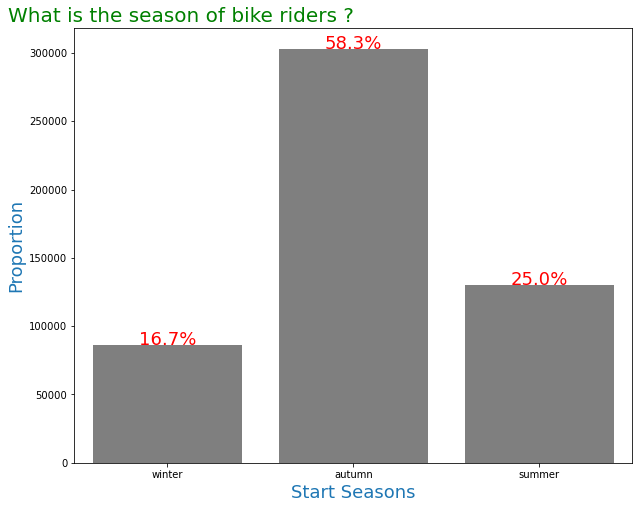

In [95]:
# create the plot for the proportion of each season across 2017 in Start_Season.
fig, ax = plt.subplots(figsize=(10,8))
fntsz = 18
fntclr = sb.color_palette()[0]
bs_color = sb.color_palette()[7]

sb.countplot(data = bike_df, x = 'Start_Seasons', color = bs_color, ax = ax)

# add annotations
n_points = bike_df.shape[0]
seasons_no = bike_df['Start_Seasons'].value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = seasons_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('Start Seasons', fontsize = fntsz, color = fntclr)
plt.ylabel('Proportion', fontsize = fntsz, color = fntclr)
plt.title('What is the season of bike riders ?', ha = 'right', fontsize = 20, color = 'g');

> Amazing! $Autumn$ is the season for bike trips with $58.3$% where $Summer$ season takes the second place with $25$% and $Winter$ season with $16.7$%. We can notice that $Spring$ season has no place in biking trips with $0$%, which is really mysterious!

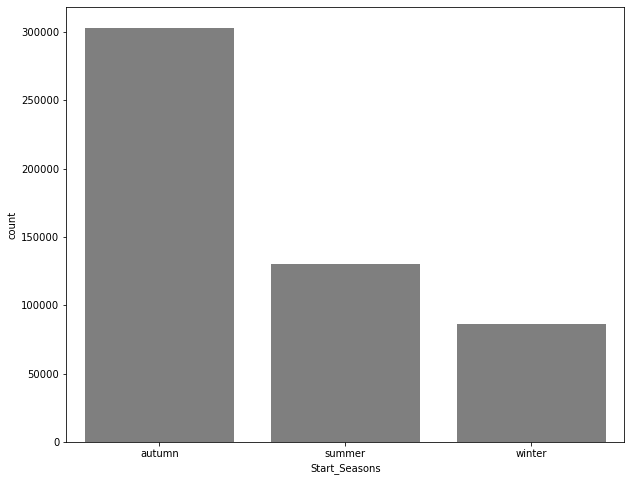

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[7]
strt_seasons_ordr = bike_df['Start_Seasons'].value_counts().index
sb.countplot(data = bike_df, x = 'Start_Seasons', color = bs_color, order = strt_seasons_ordr, ax = ax );

Text(0, 0.5, 'Proportion')

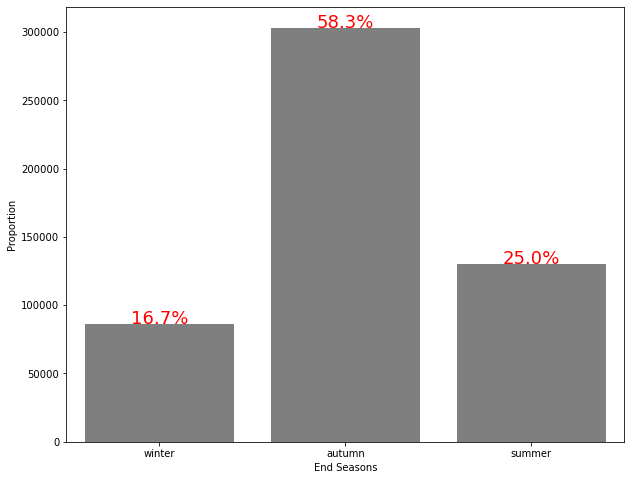

In [35]:
# create the plot for the proportion of each season across 2017 in End_Season.
fig, ax = plt.subplots(figsize=(10,8))

bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'End_Seasons', color = bs_color, ax = ax )

n_points = bike_df.shape[0]
seasons_no = bike_df['End_Seasons'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = seasons_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('End Seasons')
plt.ylabel('Proportion')

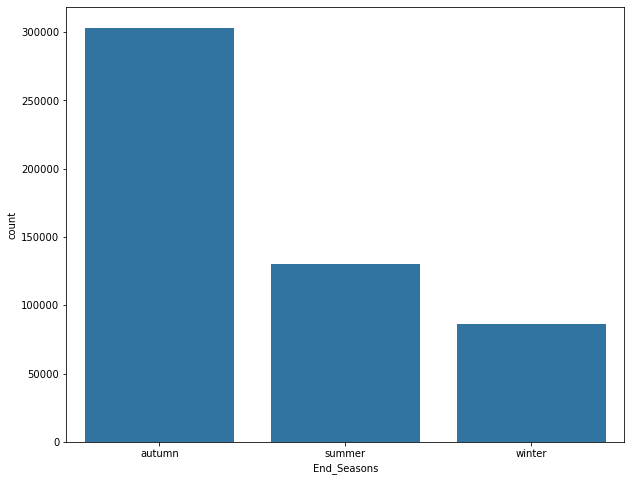

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
end_seasons_ordr = bike_df['End_Seasons'].value_counts().index
sb.countplot(data = bike_df, x = 'End_Seasons', color = bs_color, order = end_seasons_ordr, ax = ax);

> The proportions of seasons across the starting and ending trips are exactly the same!. Which we can say that $Autumn$ is the season for biking trips and $Summer$ comes next and $Winter$ is the third and $Spring$ in the last!

> Now, lets move to the next main interest variable : user_type.

## • Bike Trips User Types

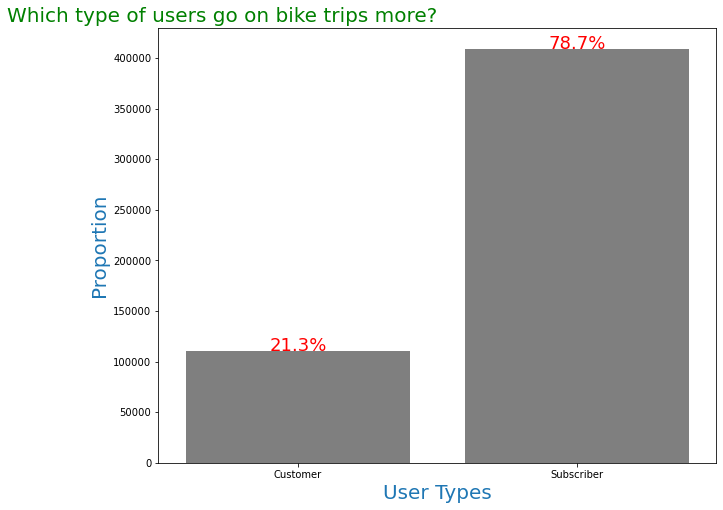

In [97]:
# create the plot for the proportion of each bike riders types across 2017.
fig, ax = plt.subplots(figsize=(10,8))
fntsz = 18
fntclr = sb.color_palette()[0]
bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'user_type', color = bs_color, ax = ax)

n_points = bike_df.shape[0]
users_no = bike_df['user_type'].value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):

    count = users_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('User Types', fontsize = 20, color = fntclr)
plt.ylabel('Proportion', fontsize = 20, color = fntclr)
plt.title('Which type of users go on bike trips more?', ha = 'right', fontsize = 20, color = 'g');

> Awesome! $Subscribers$ are the most bike riders with proportion of $78.7$% where $Customer$ bike riders has a proportion of $21.3$% across 2017.

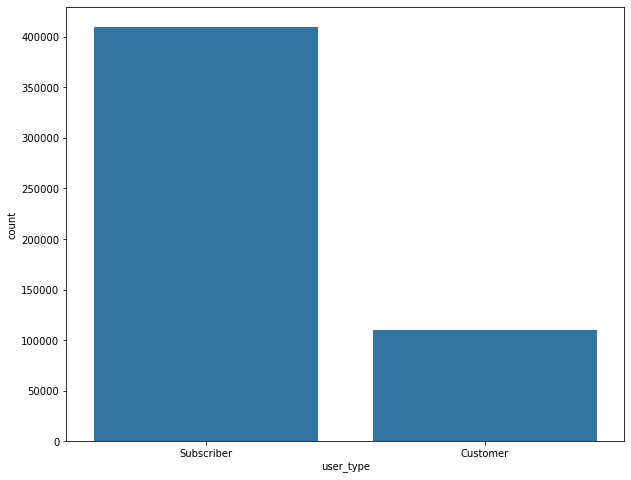

In [38]:
#Plot the bar chart of ordered user_type.
fig, ax = plt.subplots(figsize=(10,8))
base_color = sb.color_palette()[0]
users_ordr = bike_df['user_type'].value_counts().index
sb.countplot(data = bike_df, x = 'user_type', color = base_color, order = users_ordr, ax = ax);

## Trip Duration Over Seasons

In [39]:
#Create a duration dataframe across seasons.
duration_df = bike_df.groupby('Start_Seasons')['duration_sec']

In [40]:
#Calculate the total duration per season.
duration_df.count()

Start_Seasons
autumn    303107
summer    130054
winter     86539
Name: duration_sec, dtype: int64

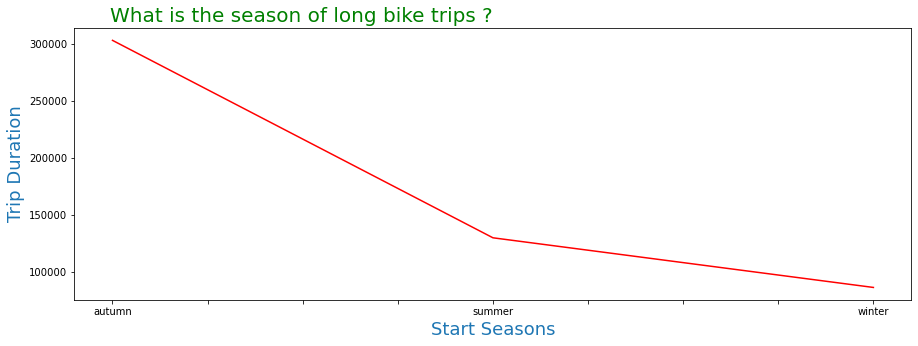

In [99]:
#Visualize the duration_sec vs seasons.
duration_df.count().plot(title = 'Trips duration across seasons', kind = 'line', figsize = (15,5), color = 'r')
plt.xlabel('Start Seasons', fontsize = fntsz, color = fntclr)
plt.ylabel('Trip Duration', fontsize = fntsz, color = fntclr)
plt.title('What is the season of long bike trips ?', ha = 'right', fontsize = 20, color = 'g');

> We can tell that the peak of bikes trips duration is in Autumn, and it decreased in a noticable way in Summer and keep decreasing but in better way in Winter.

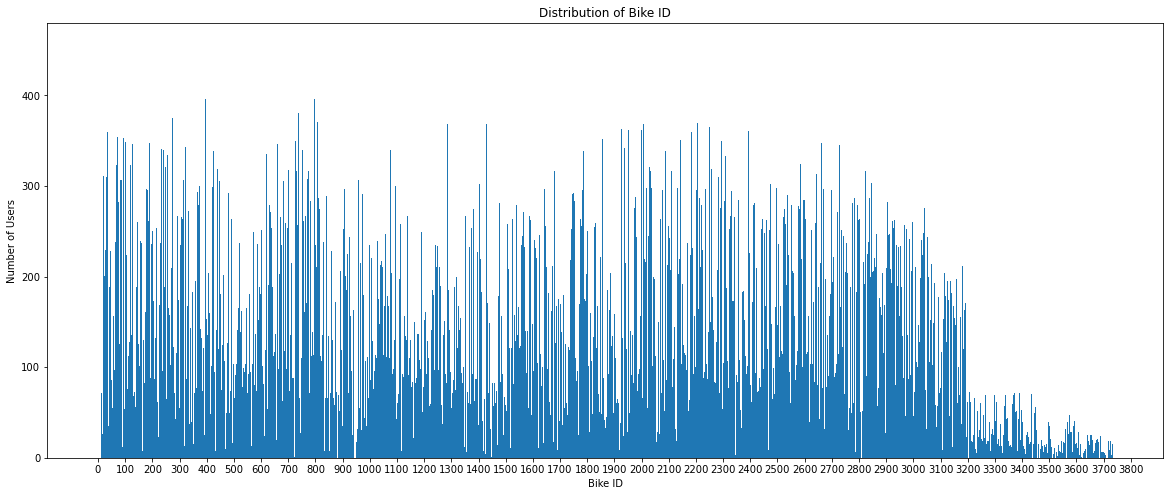

In [42]:
#Plotting bike_id distribution.
binsize = 1
bins = np.arange(0, bike_df['bike_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 3900, 100))
plt.hist(data = bike_df, x = 'bike_id', bins = bins)
plt.title('Distribution of Bike ID')
plt.xlabel('Bike ID')
plt.ylabel('Number of Users')
plt.show()

> From the visualization of bike ID we can say that there is differences between interests in using specific bikes for trips, this may relates to the features of the bike or the taste of users.

## Days of Bike Trips


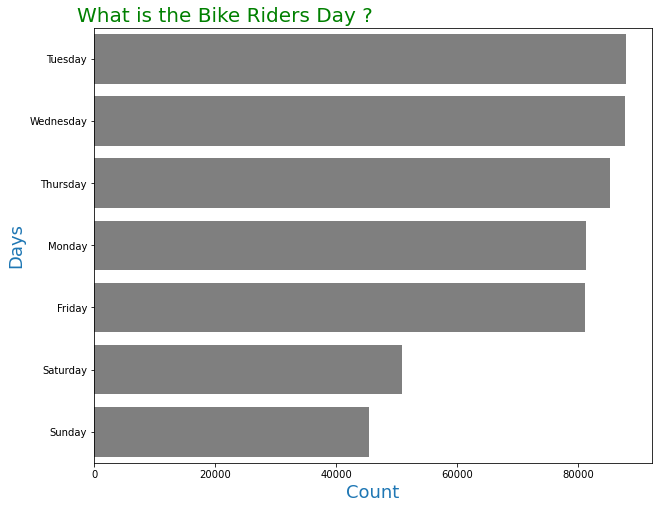

In [112]:
#Plot the days of bike trips in start_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[7]
days_ordr = bike_df['start_time_day'].value_counts().index
sb.countplot(data = bike_df, y = 'start_time_day', color = bs_color, order = days_ordr, ax = ax);
plt.title('What is the Bike Riders Day ?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('Count', fontsize = fntsz, color = fntclr)
plt.ylabel('Days', fontsize = fntsz, color = fntclr);

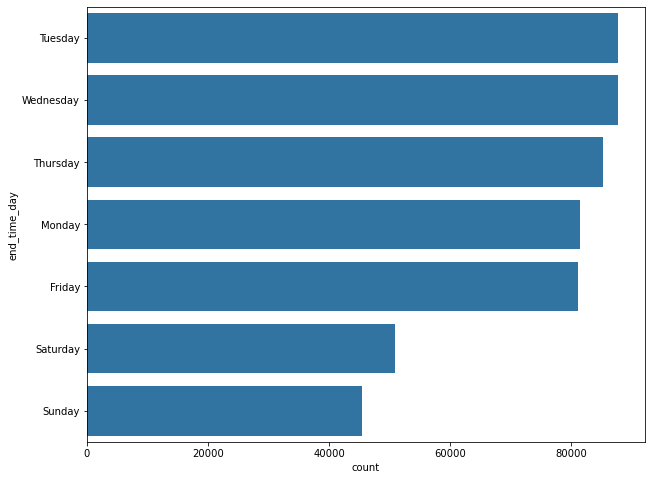

In [44]:
#Plot the days of bike trips in end_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
days_ordr = bike_df['end_time_day'].value_counts().index
sb.countplot(data = bike_df, y = 'end_time_day', color = bs_color, order = days_ordr, ax = ax);

> $Tuesday$ and $Wednesday$ have the most of bike trips, follwed by $Thursday$ which is slightly less than them followed by $Monday$ and $Friday$ which are a little bit less than the pervious days, and $Saturday$ comes next where $Sunday$ is at the last.
> We can say that bike trips are the most in the working days.

## Hours of Bike Riders

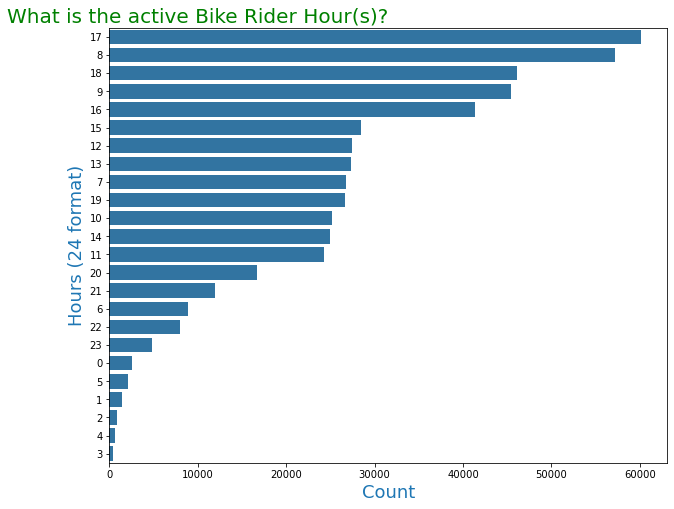

In [117]:
#Plot the hours of bike trips in start_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
days_ordr = bike_df['start_time_hour'].value_counts().index
sb.countplot(data = bike_df, y = 'start_time_hour', color = bs_color, order = days_ordr, ax = ax);

plt.title('What is the active Bike Rider Hour(s)?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('Count', fontsize = fntsz, color = fntclr)
plt.ylabel('Hours (24 format)', fontsize = fntsz, color = fntclr);

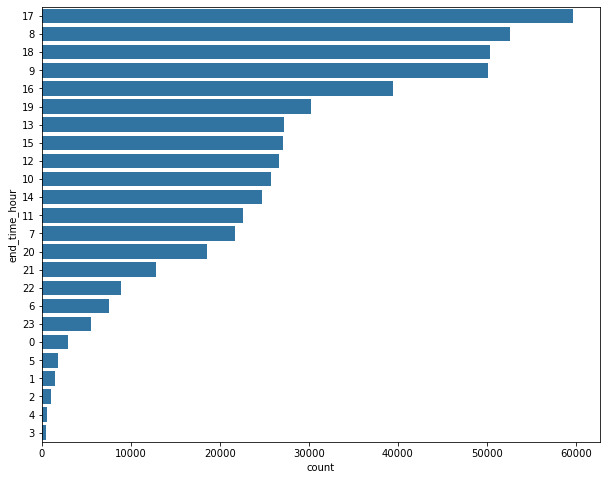

In [46]:
#Plot the hours of bike trips in end_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
days_ordr = bike_df['end_time_hour'].value_counts().index
sb.countplot(data = bike_df, y = 'end_time_hour', color = bs_color, order = days_ordr, ax = ax);

> Both of start time and end time hours are so similar to each other, in both of them $5 PM$, $8 AM$, $6 PM$, $9 PM$ and  $4 PM$ are the top bike trips in the day respectively, also they share the same least hours which are $5 AM$, $1 AM$, $2 AM$, $4 AM$and $3 AM$ in order. While they are differ from each other in the other hours of the day.

> We can say that the hours of going to work ad returning back from work is the most active bike trips hours.

## Month of Bike Riders 

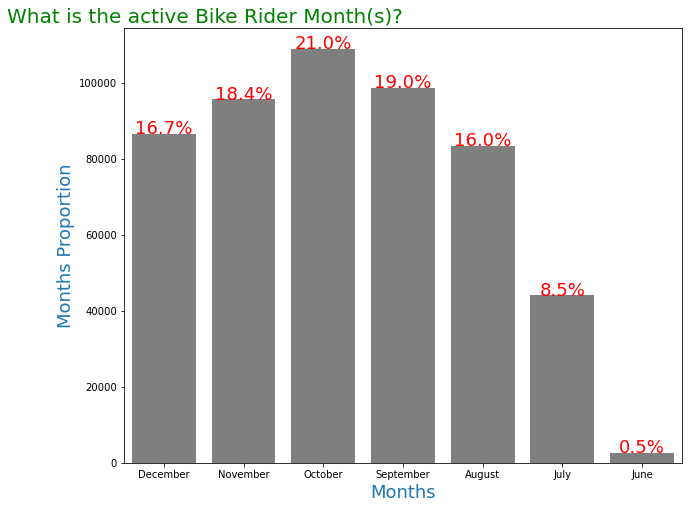

In [118]:
# create the plot for the proportion of each start_time_month across 2017.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'start_time_month', color = bs_color, ax = ax)

n_points = bike_df.shape[0]
users_no = bike_df['start_time_month'].value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):

    count = users_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.title('What is the active Bike Rider Month(s)?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('Months', fontsize = fntsz, color = fntclr)
plt.ylabel('Months Proportion', fontsize = fntsz, color = fntclr);

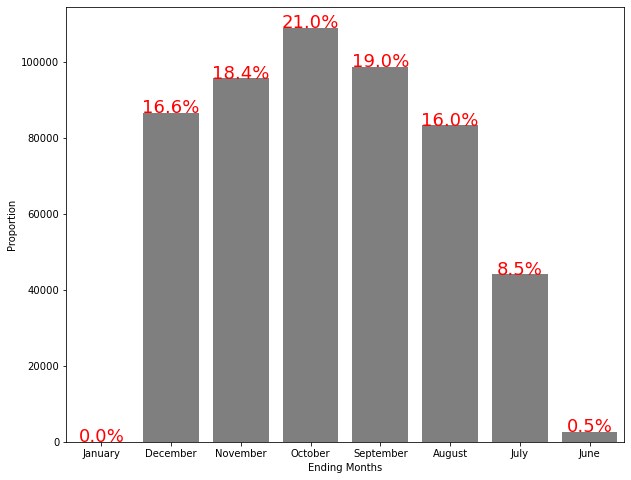

In [119]:
# create the plot for the proportion of each end_time_month across 2017.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'end_time_month', color = bs_color, ax = ax)

n_points = bike_df.shape[0]
users_no = bike_df['end_time_month'].value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):

    count = users_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('Ending Months')
plt.ylabel('Proportion');

> The proportion of months are almost the same in both starting time and ending time, $October$ with $21$%,$September$ with $19$%, $November$ with $18.4$%, $December$ with $16.7$ in starting time and with $16.6$% in ending time, $August$ with $16$%, $July$ with $8.5$%, $June$ with $0.5$% and finally $January$ with $0$%.

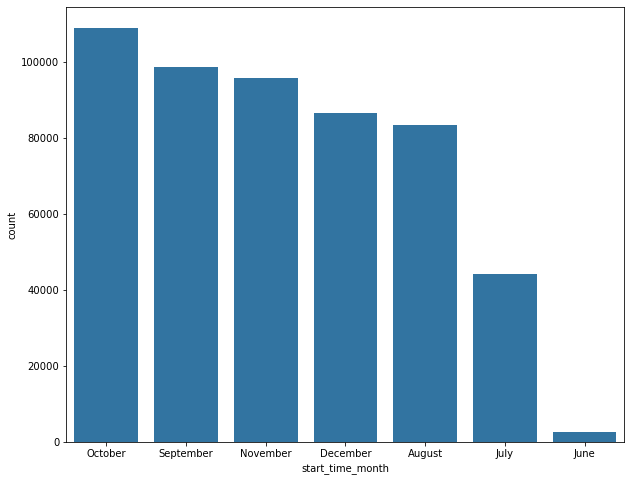

In [49]:
#Plot the months of bike trips in start_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
months_ordr = bike_df['start_time_month'].value_counts().index
sb.countplot(data = bike_df, x = 'start_time_month', color = bs_color, order = months_ordr, ax = ax);

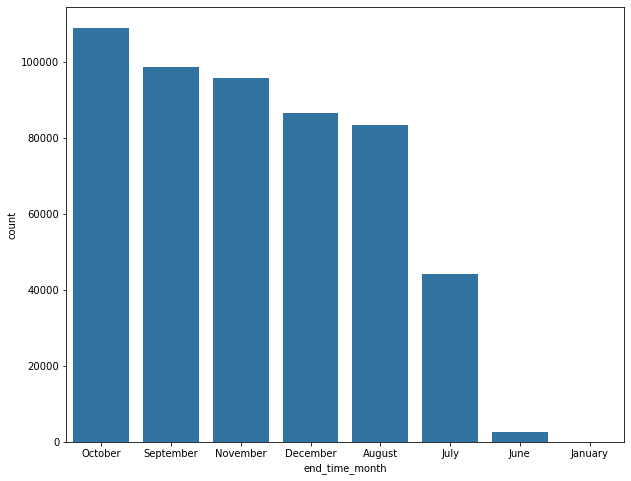

In [50]:
#Plot the months of bike trips in end_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
months_ordr = bike_df['end_time_month'].value_counts().index
sb.countplot(data = bike_df, x = 'end_time_month', color = bs_color, order = months_ordr, ax = ax);

## Top 10 Bike Riding Starting Stations

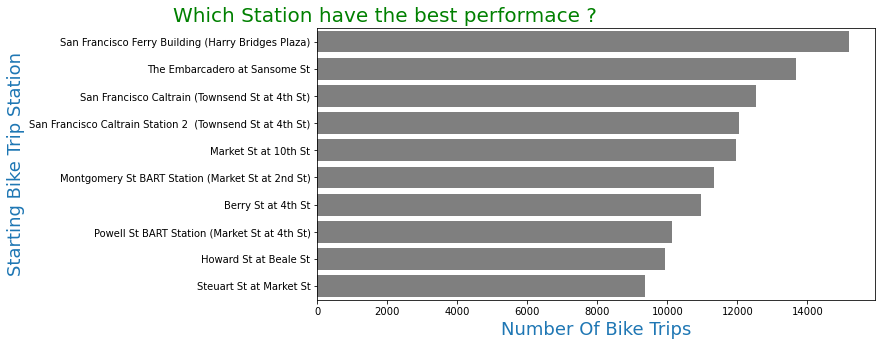

In [121]:
#Plot the top 10 starting stations
fig, ax = plt.subplots(figsize=(10,5))
bs_color = sb.color_palette()[7]
station_ordr = bike_df['start_station_name'].value_counts().index[0:10]
sb.countplot(data = bike_df, y = 'start_station_name', color = bs_color, order = station_ordr, ax = ax);


plt.title('Which Station have the best performace ?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('Number Of Bike Trips', fontsize = fntsz, color = fntclr)
plt.ylabel('Starting Bike Trip Station', fontsize = fntsz, color = fntclr);

## Top 10 Bike Riding Ending Stations

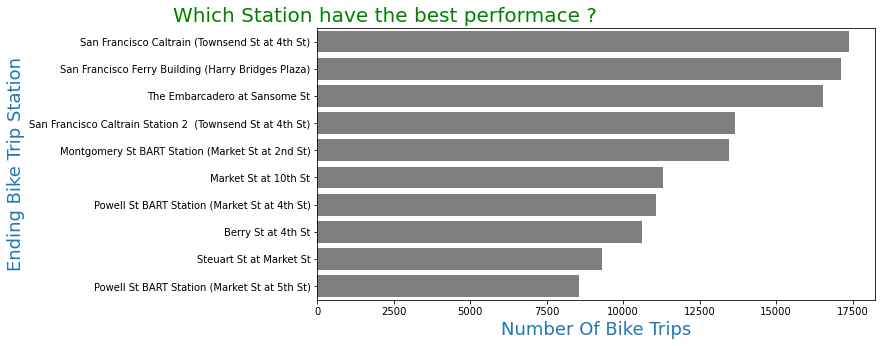

In [122]:
#Plot the top 10 ending stations
fig, ax = plt.subplots(figsize=(10,5))
bs_color = sb.color_palette()[7]
station_ordr = bike_df['end_station_name'].value_counts().index[0:10]
sb.countplot(data = bike_df, y = 'end_station_name', color = bs_color, order = station_ordr, ax = ax);

plt.title('Which Station have the best performace ?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('Number Of Bike Trips', fontsize = fntsz, color = fntclr)
plt.ylabel('Ending Bike Trip Station', fontsize = fntsz, color = fntclr);

## User Types V.S. Seasons

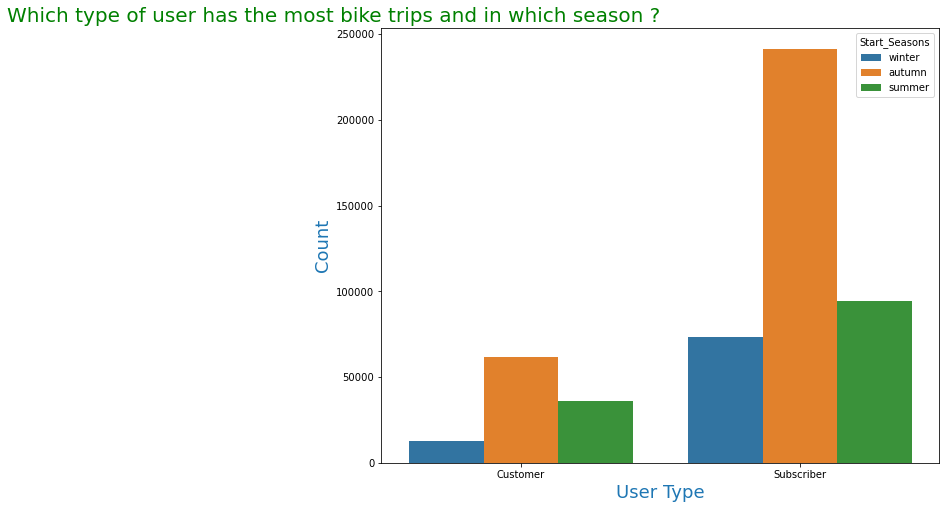

In [126]:
fig, ax = plt.subplots(figsize=(10,8))
sb.countplot(data = bike_df, x = 'user_type' , hue = 'Start_Seasons', ax = ax);

plt.title('Which type of user has the most bike trips and in which season ?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('User Type', fontsize = fntsz, color = fntclr)
plt.ylabel('Count', fontsize = fntsz, color = fntclr);

> It is obvious from the plot that Winter is the season for both types of users.

## Numerical (User Types V.S. Seasons)

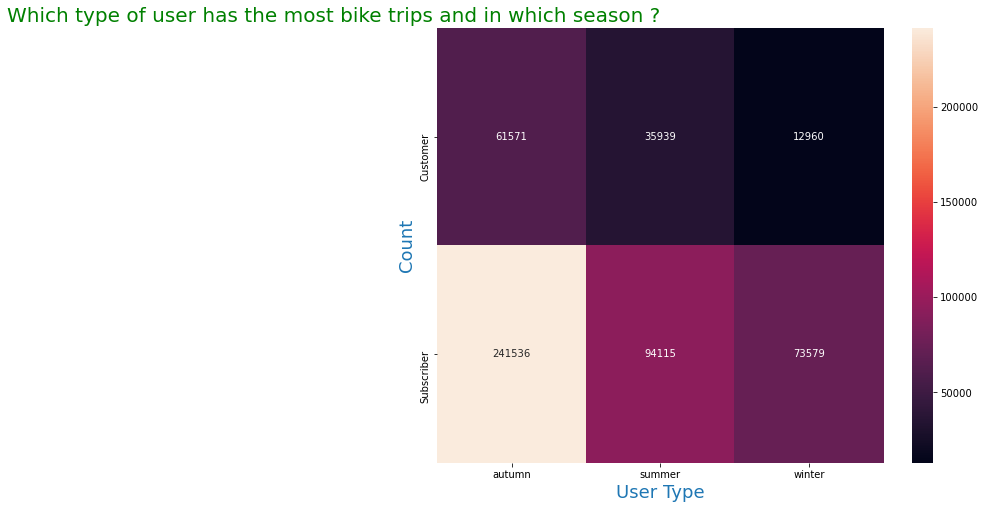

In [134]:
fig, ax = plt.subplots(figsize=(10,8))
users_counts = bike_df.groupby(['user_type', 'Start_Seasons']).size()
users_counts = users_counts.reset_index(name = 'count')
users_counts = users_counts.pivot(index = 'user_type', columns = 'Start_Seasons', values = 'count')
sb.heatmap(users_counts, annot = True, fmt = 'd' ,ax = ax);

plt.title('Which type of user has the most bike trips and in which season ?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('User Type', fontsize = fntsz, color = fntclr)
plt.ylabel('Count', fontsize = fntsz, color = fntclr);

> $Subsribers$ with $241,536$ bike riders and $Customer$ with $61,571$ bike 
riders are the most in Autumn season in 2017.


> The longest bike trips are in $July$, $September$ and $August$ respectively. Also the shortest bike trips are in $June$.

## Trip Duration V.S Months

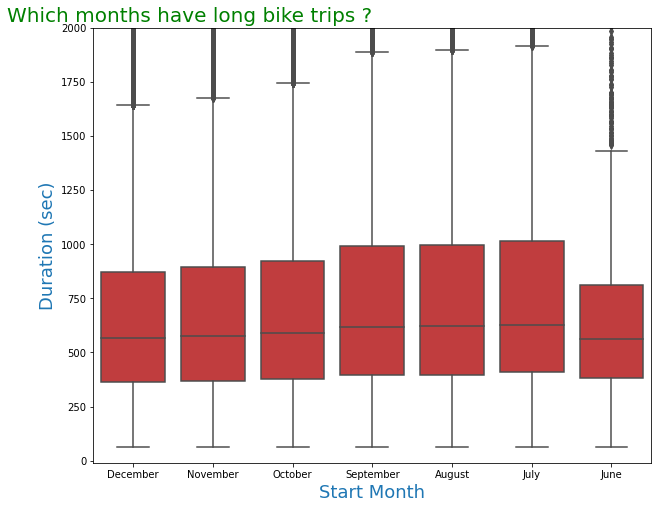

In [133]:
plt.figure(figsize = [10, 8])
bs_color = sb.color_palette()[3]
sb.boxplot(data = bike_df, x = 'start_time_month', y = 'duration_sec', color = bs_color)
plt.ylim([-10, 2000])

plt.title('Which months have long bike trips ?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('Start Month', fontsize = fntsz, color = fntclr)
plt.ylabel('Duration (sec)', fontsize = fntsz, color = fntclr);
plt.show()

## Active Days per Seaons

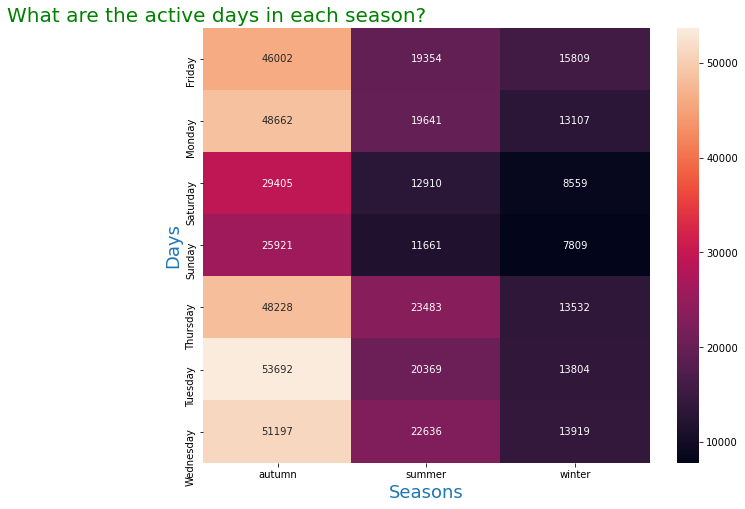

In [135]:
fig, ax = plt.subplots(figsize=(10,8))
day_counts = bike_df.groupby(['start_time_day', 'Start_Seasons']).size()
day_counts = day_counts.reset_index(name = 'count')
day_counts = day_counts.pivot(index = 'start_time_day', columns = 'Start_Seasons', values = 'count')
sb.heatmap(day_counts, annot = True, fmt = 'd', ax = ax);

plt.title('What are the active days in each season?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('Seasons', fontsize = fntsz, color = fntclr)
plt.ylabel('Days', fontsize = fntsz, color = fntclr);
plt.show()

> $Tuesday$ is the most bikers day in $Autumn$ with $53,692$ bike riders followed by $Wednesday$ with $51,197$ bike riders. Unlike Autumn, $Thuresday$ in $Summer$ is the day of bike riders with $23,483$ users followed by $Wednesday$ with $22,636$ riders. The most riders day in $Winter$ is $Wedesday$ with $13,919$ riders where $Tuesday$ comes next with $13,804$ riders.

## Active Hours per Day

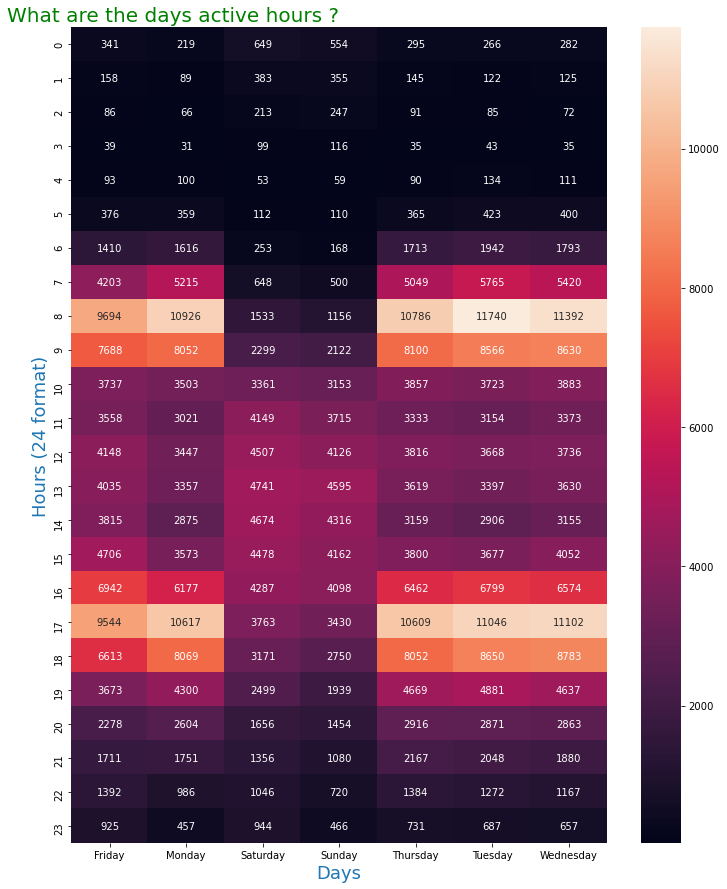

In [147]:
day_counts = bike_df.groupby(['start_time_day', 'start_time_hour']).size()
day_counts = day_counts.reset_index(name = 'count')
day_counts = day_counts.pivot(index = 'start_time_hour', columns = 'start_time_day', values = 'count')
fig, ax = plt.subplots(figsize=(12,15))
sb.heatmap(day_counts, annot = True, fmt = 'd', ax = ax);

plt.title('What are the days active hours ?', ha = 'right' ,fontsize = 20, color = 'g')
plt.xlabel('Days', fontsize = fntsz, color = fntclr)
plt.ylabel('Hours (24 format)', fontsize = fntsz, color = fntclr);
plt.show()

> According to the visualization shown above we can say that the starting and ending working hours $8 AM$ and $5 PM$ in working days have the most bike riders.

## User Types V.S Top 10 Starting Stations

In [58]:
#create a dataframe for each user_type.
subsriber_df = bike_df.query('user_type == "Subscriber"').start_station_name.value_counts()
customer_df = bike_df.query('user_type == "Customer"').start_station_name.value_counts()

station_count = bike_df.start_station_name.value_counts()
y = station_count.values[0:10] 
x = station_count.index[0:10]

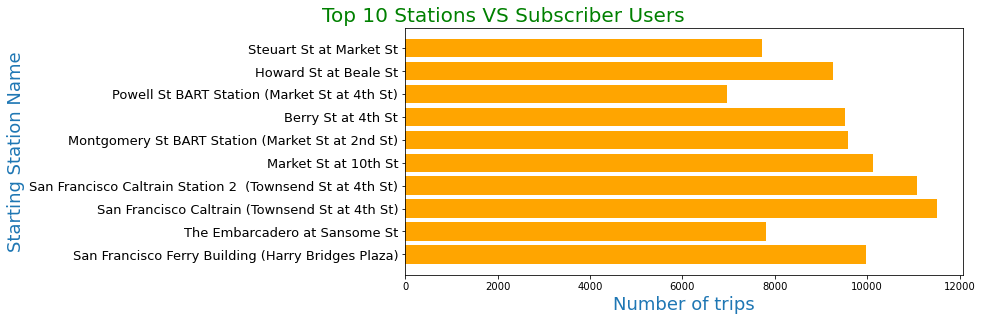

In [151]:
x_subsriber = subsriber_df.index[0:10] 
y_subsriber = subsriber_df.values[0:10] 

x_customer = customer_df.index[0:10] 
y_customer = customer_df.values[0:10] 

#Plot the top 10 starting stations VS Subscribers.
plt.figure(figsize = [10, 10])

plt.subplot(2,1,1)
plt.barh(x, subsriber_df[x],color ='orange')
plt.yticks(fontsize = 13)
plt.title('Top 10 Stations VS Subscriber Users', ha = 'right', fontsize = 20, color = 'g')
plt.xlabel('Number of trips', fontsize = fntsz, color = fntclr)
plt.ylabel('Starting Station Name', fontsize = fntsz, color = fntclr);

> $San$ $Francisco$ $Caltrain$ $(Townsend$ $St$ $at$ $4th$ $St)$ station is the most station registration in 2017 where $Powell$ $St$ $BART$ $Station$ $(Market$ $St$ $at$ $4th$ $St)$ comes in the 10th place in the same year.

## User Types V.S Top 10 Ending Stations

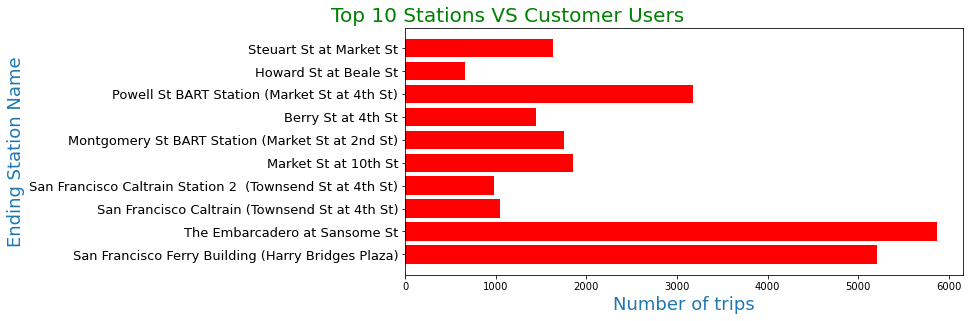

In [154]:
#Plot the top 10 starting stations VS Customers.
plt.figure(figsize = [10, 10])

plt.subplot(2,1,1)
plt.barh(x, customer_df[x], color = 'r')
plt.yticks(fontsize = 13)
plt.title('Top 10 Stations VS Customer Users', ha = 'right', fontsize = 20, color = 'g')
plt.xlabel('Number of trips', fontsize = fntsz, color = fntclr)
plt.ylabel('Ending Station Name', fontsize = fntsz, color = fntclr);

> $The$ $Embarcadero$ $at$ $at$ $Sansome$ $St$ station is the most guests station in 2017 where $Howard$ $St$ $at$ $Beale$ $St$ comes in the 10th place in the same year.

## Relationship between Features

Lets see the correlation between numeric variables in the dataset which are : duration_sec, start_station_id, end_station_id, start_time_hour, end_time_hour and bike_id.

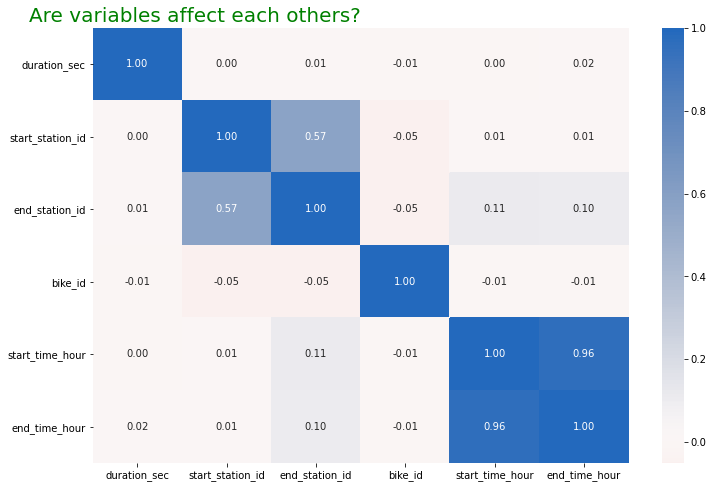

In [158]:
fig, ax = plt.subplots(figsize=(12,8))
sb.heatmap(bike_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0, ax = ax);

plt.title('Are variables affect each others?', ha = 'right', fontsize = 20, color = 'g');

> The $relationship$ between the $starting$ and $ending$ $hours$ of the trip is $positively$ $strong$ with a correlation factor $0.96$. Also The $relationship$ between the $starting$ and $ending$ $station$ $ID$ of the trip is considered to be $strong$ with a correlation factor $0.57$. In other hand there is no relation at all between the $duration$ of the trip and the $starting$ $stations$ and $statring$ $hours$ with $ZERO$ correlation factor.


## Trips Duration and Season with the User Types

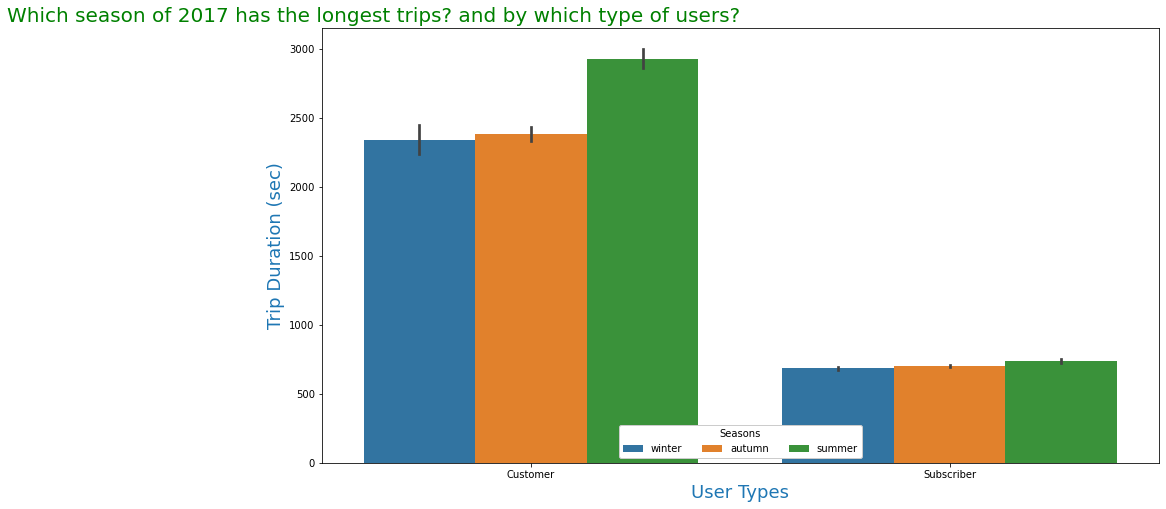

In [165]:
fig, ax = plt.subplots(figsize=(15,8))
axis = sb.barplot(data = bike_df, x = 'user_type', y = 'duration_sec', hue = 'Start_Seasons')
axis.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Seasons');

plt.title('Which season of 2017 has the longest trips? and by which type of users?', ha = 'right', fontsize = 20, color = 'g')
plt.xlabel('User Types', fontsize = fntsz, color = fntclr)
plt.ylabel('Trip Duration (sec)', fontsize = fntsz, color = fntclr);

> $Customer$ users spend much $longer$ duration trips compared with $subscribers$ and they have the best performance in $Summer$ for both users followed by autumn and winter respectively.

## Days and Hours with the Season in 2017

In [63]:
#create dataframe for each season.
summer_df = bike_df.query('Start_Seasons == "summer"').groupby(['start_time_day','start_time_hour'], as_index=False).size().reset_index()
winter_df = bike_df.query('Start_Seasons == "winter"').groupby(['start_time_day','start_time_hour'], as_index=False).size().reset_index()
autumn_df = bike_df.query('Start_Seasons == "autumn"').groupby(['start_time_day','start_time_hour'], as_index=False).size().reset_index()

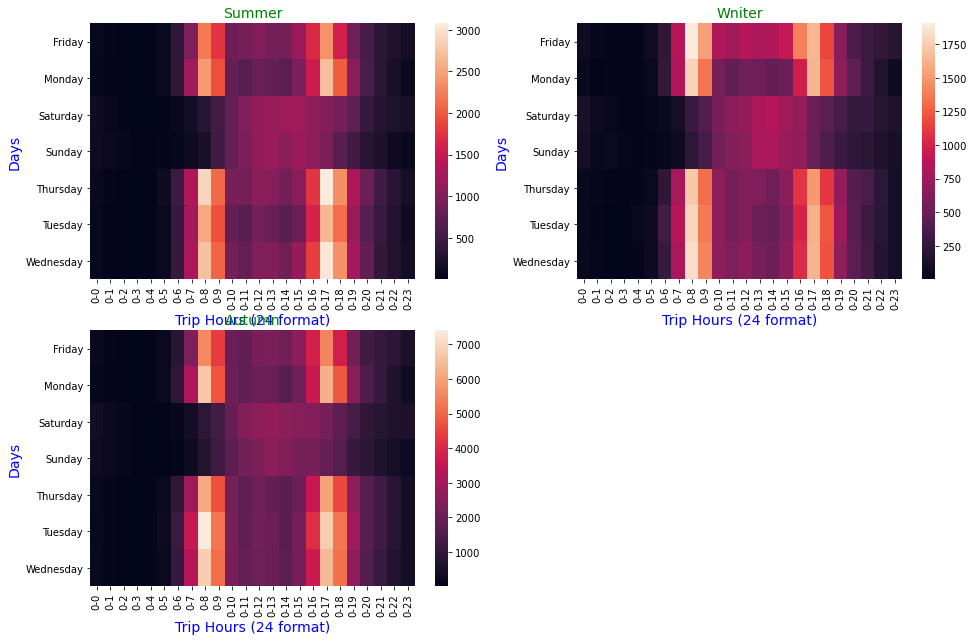

In [183]:
#Plot the heat map fpr each season.
plt.figure(figsize = [16, 16]) 
fontSize = 14
fontColor = 'blue'

plt.subplot(3,2,1)
sb.heatmap(summer_df.pivot('start_time_day','start_time_hour'));
plt.title('Summer' , fontsize = fontSize, color = 'g')
plt.ylabel('Days', fontsize = fontSize, color = fontColor)
plt.xlabel('Trip Hours (24 format)', fontsize = fontSize, color = fontColor);

plt.subplot(3,2,2) 
sb.heatmap(winter_df.pivot('start_time_day','start_time_hour'));
plt.title('Wniter', fontsize = fontSize, color = 'g')
plt.ylabel('Days', fontsize = fontSize, color = fontColor)
plt.xlabel('Trip Hours (24 format)', fontsize = fontSize, color = fontColor);

plt.subplot(3,2,3) 
sb.heatmap(autumn_df.pivot('start_time_day','start_time_hour'));
plt.title('Autumn', fontsize = fontSize, color = 'g')
plt.ylabel('Days', fontsize = fontSize, color = fontColor)
plt.xlabel('Trip Hours (24 format)', fontsize = fontSize, color = fontColor);

> According to the visualization, for all seasons $8$ $AM$ and $5$ $PM$ are the most active hours in the whole week but it withdraw on $Saturday$ and $Sunday$ as long as they are days off.

### Conclusion

> As a conclusion, we can say that Autumn was the most active bike riding season where Summer comes to the fist place when we put the duration of the trip in our consideration. The thing which is really strange that there is NO bike riders in Spring, and I think that is because there is no data for Spring season in this dataset. Subscriber users are the most bike riders in all season where Customer users comes to the first place when it comes to consider the duration of the trip. Moreover 8 Am and 5 PM are the most biking trips across the working days for all seasons.



In [185]:
!jupyter nbconvert GoBike_Exploration_Slides.ipynb --to slides --template output_toggle

[NbConvertApp] Converting notebook GoBike_Exploration_Slides.ipynb to slides
[NbConvertApp] Writing 1055345 bytes to GoBike_Exploration_Slides.slides.html
